In [10]:
import multiprocessing as mp

import matplotlib.pyplot as plt
import numpy as np
import tiktoken
from tqdm import tqdm

from datasets import load_dataset

In [11]:
split = "train"

In [12]:
articles = load_dataset("ccdv/arxiv-summarization", split=split, cache_dir="./data")["article"]
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

def tok_length(s):
    return len(enc.encode(s))

with mp.Pool() as pool:
    lengths = list(tqdm(pool.imap_unordered(tok_length, articles, chunksize=120), total=len(articles)))

del articles

No config specified, defaulting to: arxiv-summarization/section
Found cached dataset arxiv-summarization (/home/kyle/research/language-programmes-IFT6670A/data/ccdv___arxiv-summarization/section/1.0.0/fa2c9abf4312afb8660ef8e041d576b8e3943ea96ae771bd3cd091b5798e7cc3)
100%|██████████| 203037/203037 [04:05<00:00, 828.23it/s] 


In [13]:
# descriptive statistics
mean_length = np.mean(lengths)
median_length = np.median(lengths)
min_length = np.min(lengths)
max_length = np.max(lengths)

# print
print("mean length:", mean_length)
print("median length:", median_length)
print("minimum length:", min_length)
print("maximum length:", max_length)

mean length: 8630.158665661924
median length: 6883.0
minimum length: 0
maximum length: 329071


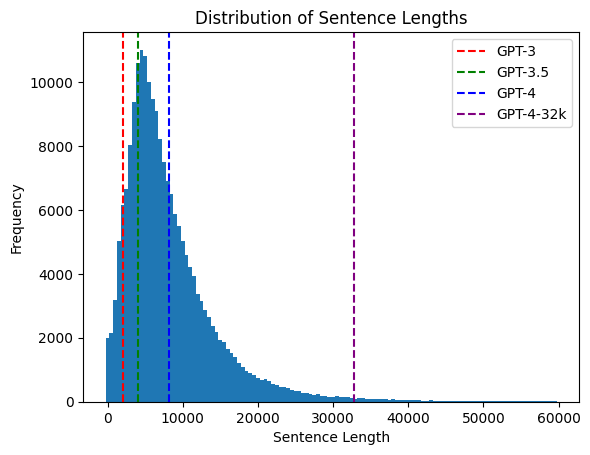

In [14]:
# histogram
plt.hist(lengths, bins=range(min_length-2, 60000, 500), align='left')

# set axis labels and title
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')

# add max context length of GPT models for reference
gpt_lengths = [
    ("GPT-3", 2049, "r"),
    ("GPT-3.5", 4097, "g"),
    ("GPT-4", 8192, "b"),
    ("GPT-4-32k", 32768, "purple"),
]
for model, x, c in gpt_lengths:
    plt.axvline(x=x, color=c, linestyle="--", label=model)
plt.legend()

# display
plt.savefig(f"report/images/length_hist_{split}.png")
plt.show()
